In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [39]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [40]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [41]:
df.rename(columns={'person_age': 'age', 'person_gender': 'gender',
                   'person_education': 'education', 'person_income': 'income',
                   'person_emp_exp': 'experience', 'person_home_ownership': 'home_ownership',
                   'loan_amnt': 'loan_amount', 'cb_person_cred_hist_length': 'credit_years',
                   'previous_loan_defaults_on_file': 'previous_defaults'
                   }, inplace=True)

In [42]:
df.columns

Index(['age', 'gender', 'education', 'income', 'experience', 'home_ownership',
       'loan_amount', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'credit_years', 'credit_score', 'previous_defaults', 'loan_status'],
      dtype='object')

In [43]:
df.isnull().sum()

age                    0
gender                 0
education              0
income                 0
experience             0
home_ownership         0
loan_amount            0
loan_intent            0
loan_int_rate          0
loan_percent_income    0
credit_years           0
credit_score           0
previous_defaults      0
loan_status            0
dtype: int64

In [44]:
df.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,loan_percent_income,credit_years,credit_score,previous_defaults,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [45]:
df.gender.value_counts()

gender
male      24841
female    20159
Name: count, dtype: int64

In [46]:
gender_df = pd.DataFrame(df.gender.value_counts())
gender_df

,count
gender,
male,24841
female,20159


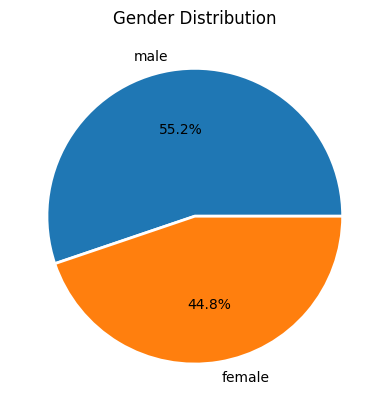

In [47]:
plt.pie(gender_df['count'], labels=gender_df.index, wedgeprops = {"linewidth": 2, "edgecolor": "white"}, autopct='%1.1f%%')
plt.title('Gender Distribution');

In [54]:
gender_rate = df.groupby(['gender'])['loan_status'].mean()
gender_rate


gender
female    0.222481
male      0.222012
Name: loan_status, dtype: float64

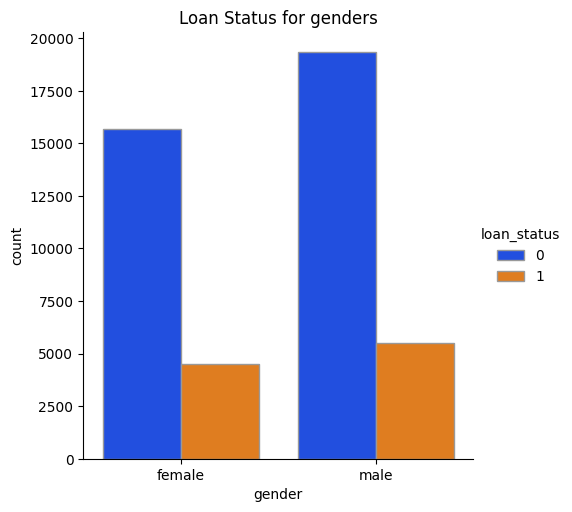

In [48]:
sns.catplot(data=df, x="gender", hue="loan_status", kind="count", palette="bright", edgecolor=".6").set(title='Loan Status for genders')



In [49]:
df.education.value_counts()

education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [58]:


education_levels = pd.DataFrame(df.education.value_counts())
education_levels



,count
education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


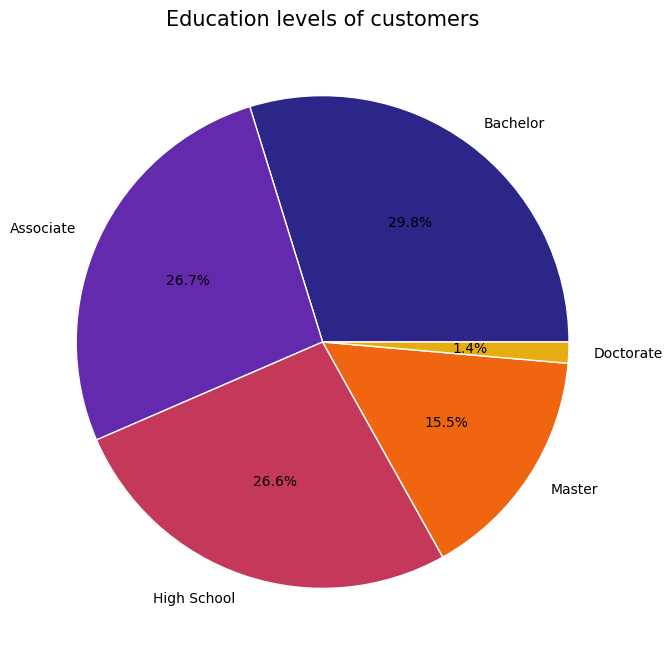

In [63]:
plt.figure(figsize=[15,8])
colors = sns.color_palette(palette='CMRmap')
plt.pie(education_levels['count'], labels=education_levels.index, colors=colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%')
plt.title('Education levels of customers', fontsize = 15);

In [50]:
education_rate = df.groupby(['education'])['loan_status'].mean()
education_rate



education
Associate      0.220319
Bachelor       0.225241
Doctorate      0.228663
High School    0.223104
Master         0.217622
Name: loan_status, dtype: float64

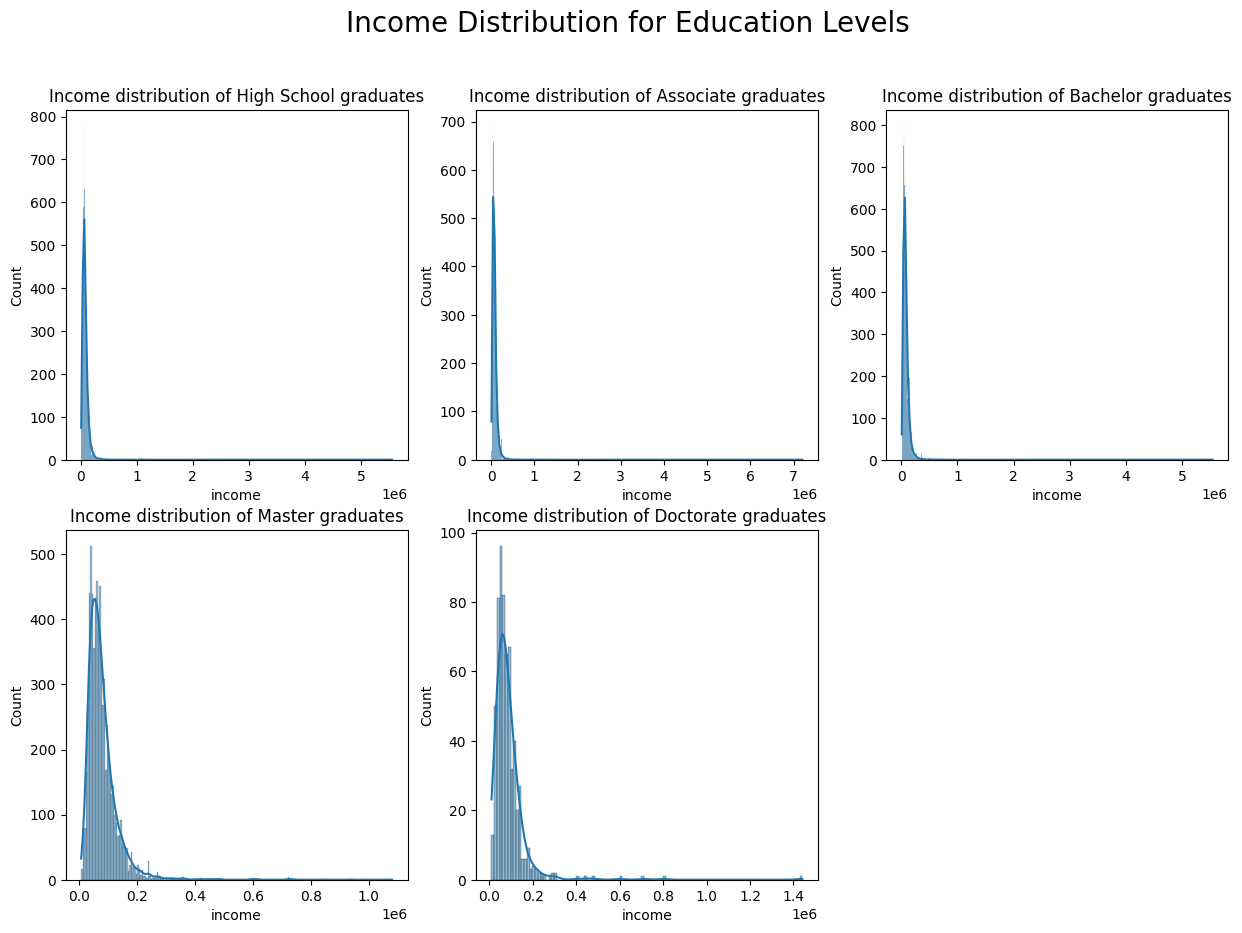

In [51]:
plt.figure(figsize=[15,10])

plt.suptitle('Income Distribution for Education Levels', fontsize = 20)


plt.subplot(2,3,1)
sns.histplot(data = df.loc[df['education']=="High School", 'income'], kde=True)
plt.title('Income distribution of High School graduates');

plt.subplot(2,3,2)
sns.histplot(data = df.loc[df['education']=="Associate", 'income'], kde=True)
plt.title('Income distribution of Associate graduates');

plt.subplot(2,3,3)
sns.histplot(data = df.loc[df['education']=="Bachelor", 'income'], kde=True)
plt.title('Income distribution of Bachelor graduates');

plt.subplot(2,3,4)
sns.histplot(data = df.loc[df['education']=="Master", 'income'], kde=True)
plt.title('Income distribution of Master graduates');

plt.subplot(2,3,5)
sns.histplot(data = df.loc[df['education']=="Doctorate", 'income'], kde=True)
plt.title('Income distribution of Doctorate graduates');


In [52]:
df.home_ownership.value_counts()

home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [53]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

C:\Users\Ahoya\AppData\Local\Temp\ipykernel_2868\741431084.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='loan_intent', hue='loan_status', palette=colors , edgecolor='.6')


Text(0, 0.5, 'Count')

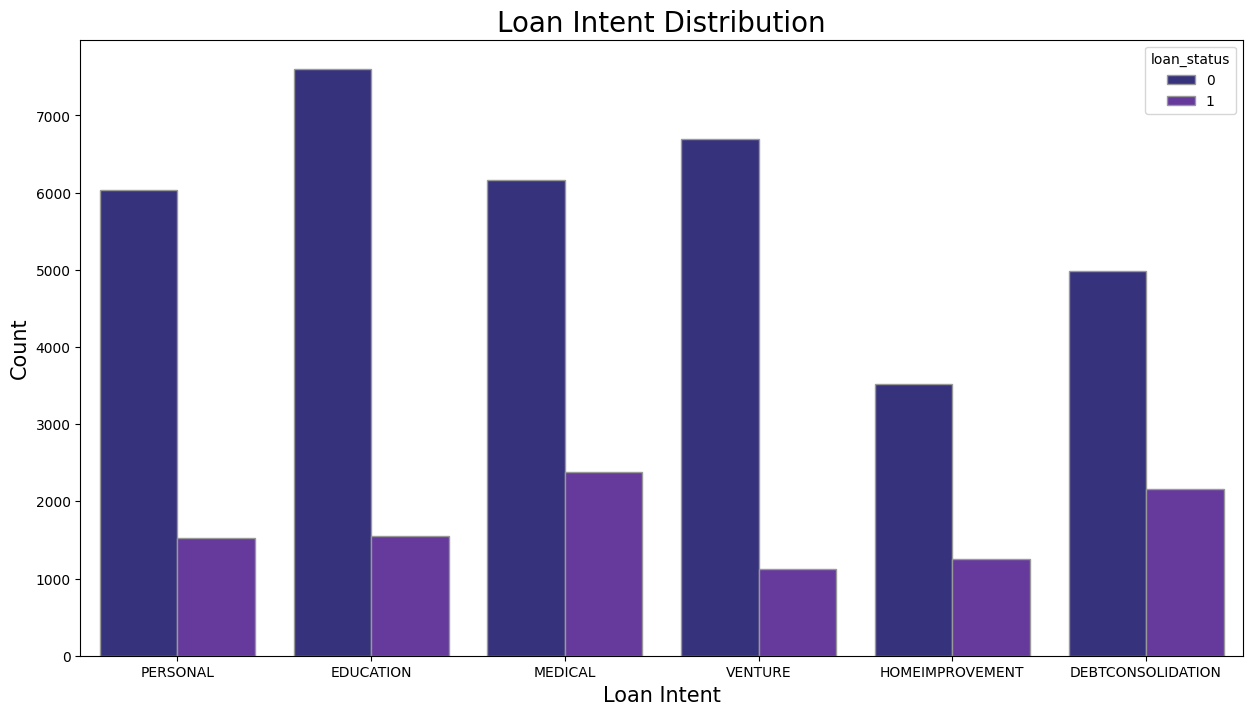

In [ ]:
plt.figure(figsize=[15,8])
sns.countplot(data=df, x='loan_intent', hue='loan_status', palette=colors , edgecolor='.6')
plt.title('Loan Intent Distribution', fontsize=20)
plt.xlabel('Loan Intent', fontsize=15)
plt.ylabel('Count', fontsize=15)


In [80]:
loan_intent_rate = df.groupby(['loan_intent'])['loan_status'].mean()
loan_intent_rate

loan_intent
DEBTCONSOLIDATION    0.302729
EDUCATION            0.169562
HOMEIMPROVEMENT      0.263015
MEDICAL              0.278194
PERSONAL             0.201404
VENTURE              0.144264
Name: loan_status, dtype: float64

C:\Users\Ahoya\AppData\Local\Temp\ipykernel_2868\4146803119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=df.loan_intent, y=df.loan_status, palette=colors, edgecolor='.6')


<Axes: xlabel='loan_intent', ylabel='loan_status'>

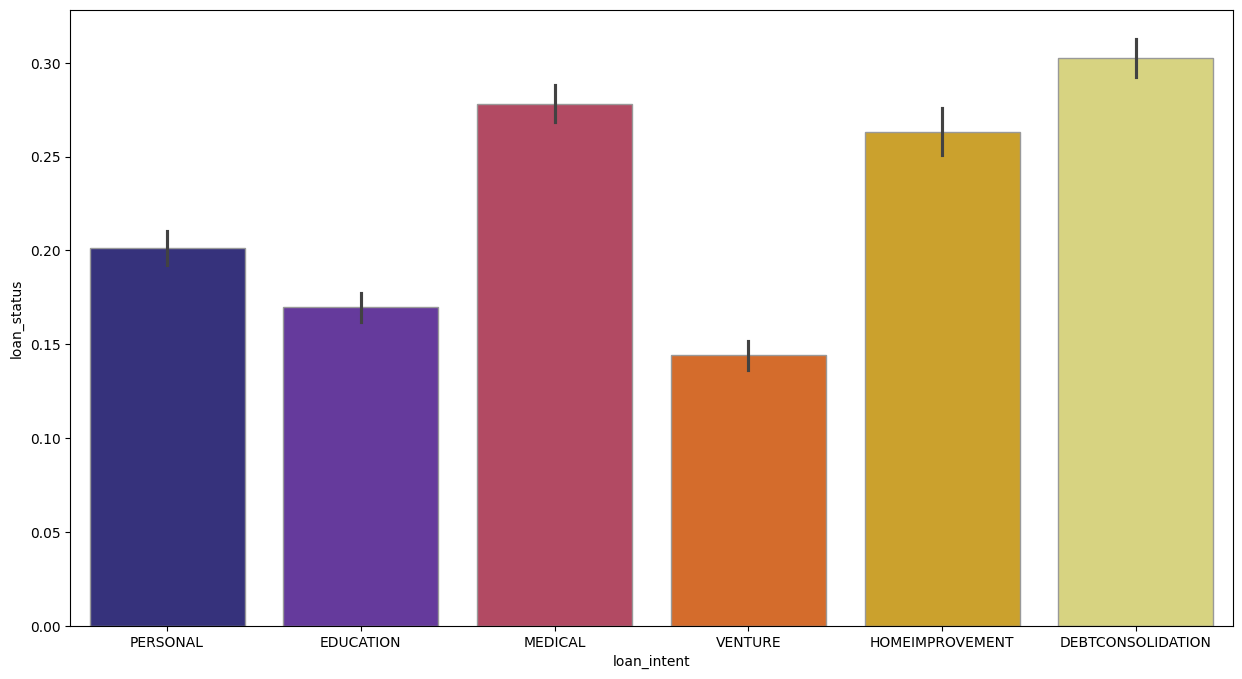

In [88]:
plt.figure(figsize=[15,8])
sns.barplot(data=df, x=df.loan_intent, y=df.loan_status, palette=colors, edgecolor='.6')